# Worst-Case Analysis

In [19]:
import numpy as np
import pandas as pd

data = pd.read_excel("2024_02_07.xlsx", sheet_name= 'CP  GCE', header=None)
data.head(32)

,0,1,2,3,4,5,6,7,8,9,10
0,TC(總成本),298390109.2,299233694.8,297715415.1,298223988.6,298529422.4,298638260.2,299587897.9,299324411.2,299688307.5,297978905.3
1,TC1(加工),266981941,266981941,266981941,266981941,266981941,266981941,266981941,266981941,266981941,266981941
2,TC2(設置),3219,3125,2873,2592,2864,3060,3481,2744,2620,2786
3,TC3(達交),30559011.6,31403141.12,29885713.42,30395287.97,30701349.79,30811131.58,31203185.87,31499306.15,31863326.51,30153758.33
4,TC4(買碳權),5517.635057,5067.635057,4467.635057,3747.635057,2847.635057,1707.635057,0,0,0,0
5,TC5(賣碳權),0,0,0,0,0,0,637.919967,782.364943,2432.364943,4382.364943
6,TC6(投資效率),840420,840420,840420,840420,840420,840420,840420,840420,840420,840420
7,TC7(投資節能),0,0,0,0,0,0,558870,0,0,0
8,Phi_hat(生產效率),1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1
9,Eplison(節能效率),0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7


In [20]:
x_row = np.array(data.iloc[14, 1:].astype(str))
x_row

array(['0.62', '0.77', '0.97', '1.21', '1.51', '1.89', '2.27', '2.72',
       '3.27', '3.92'], dtype=object)

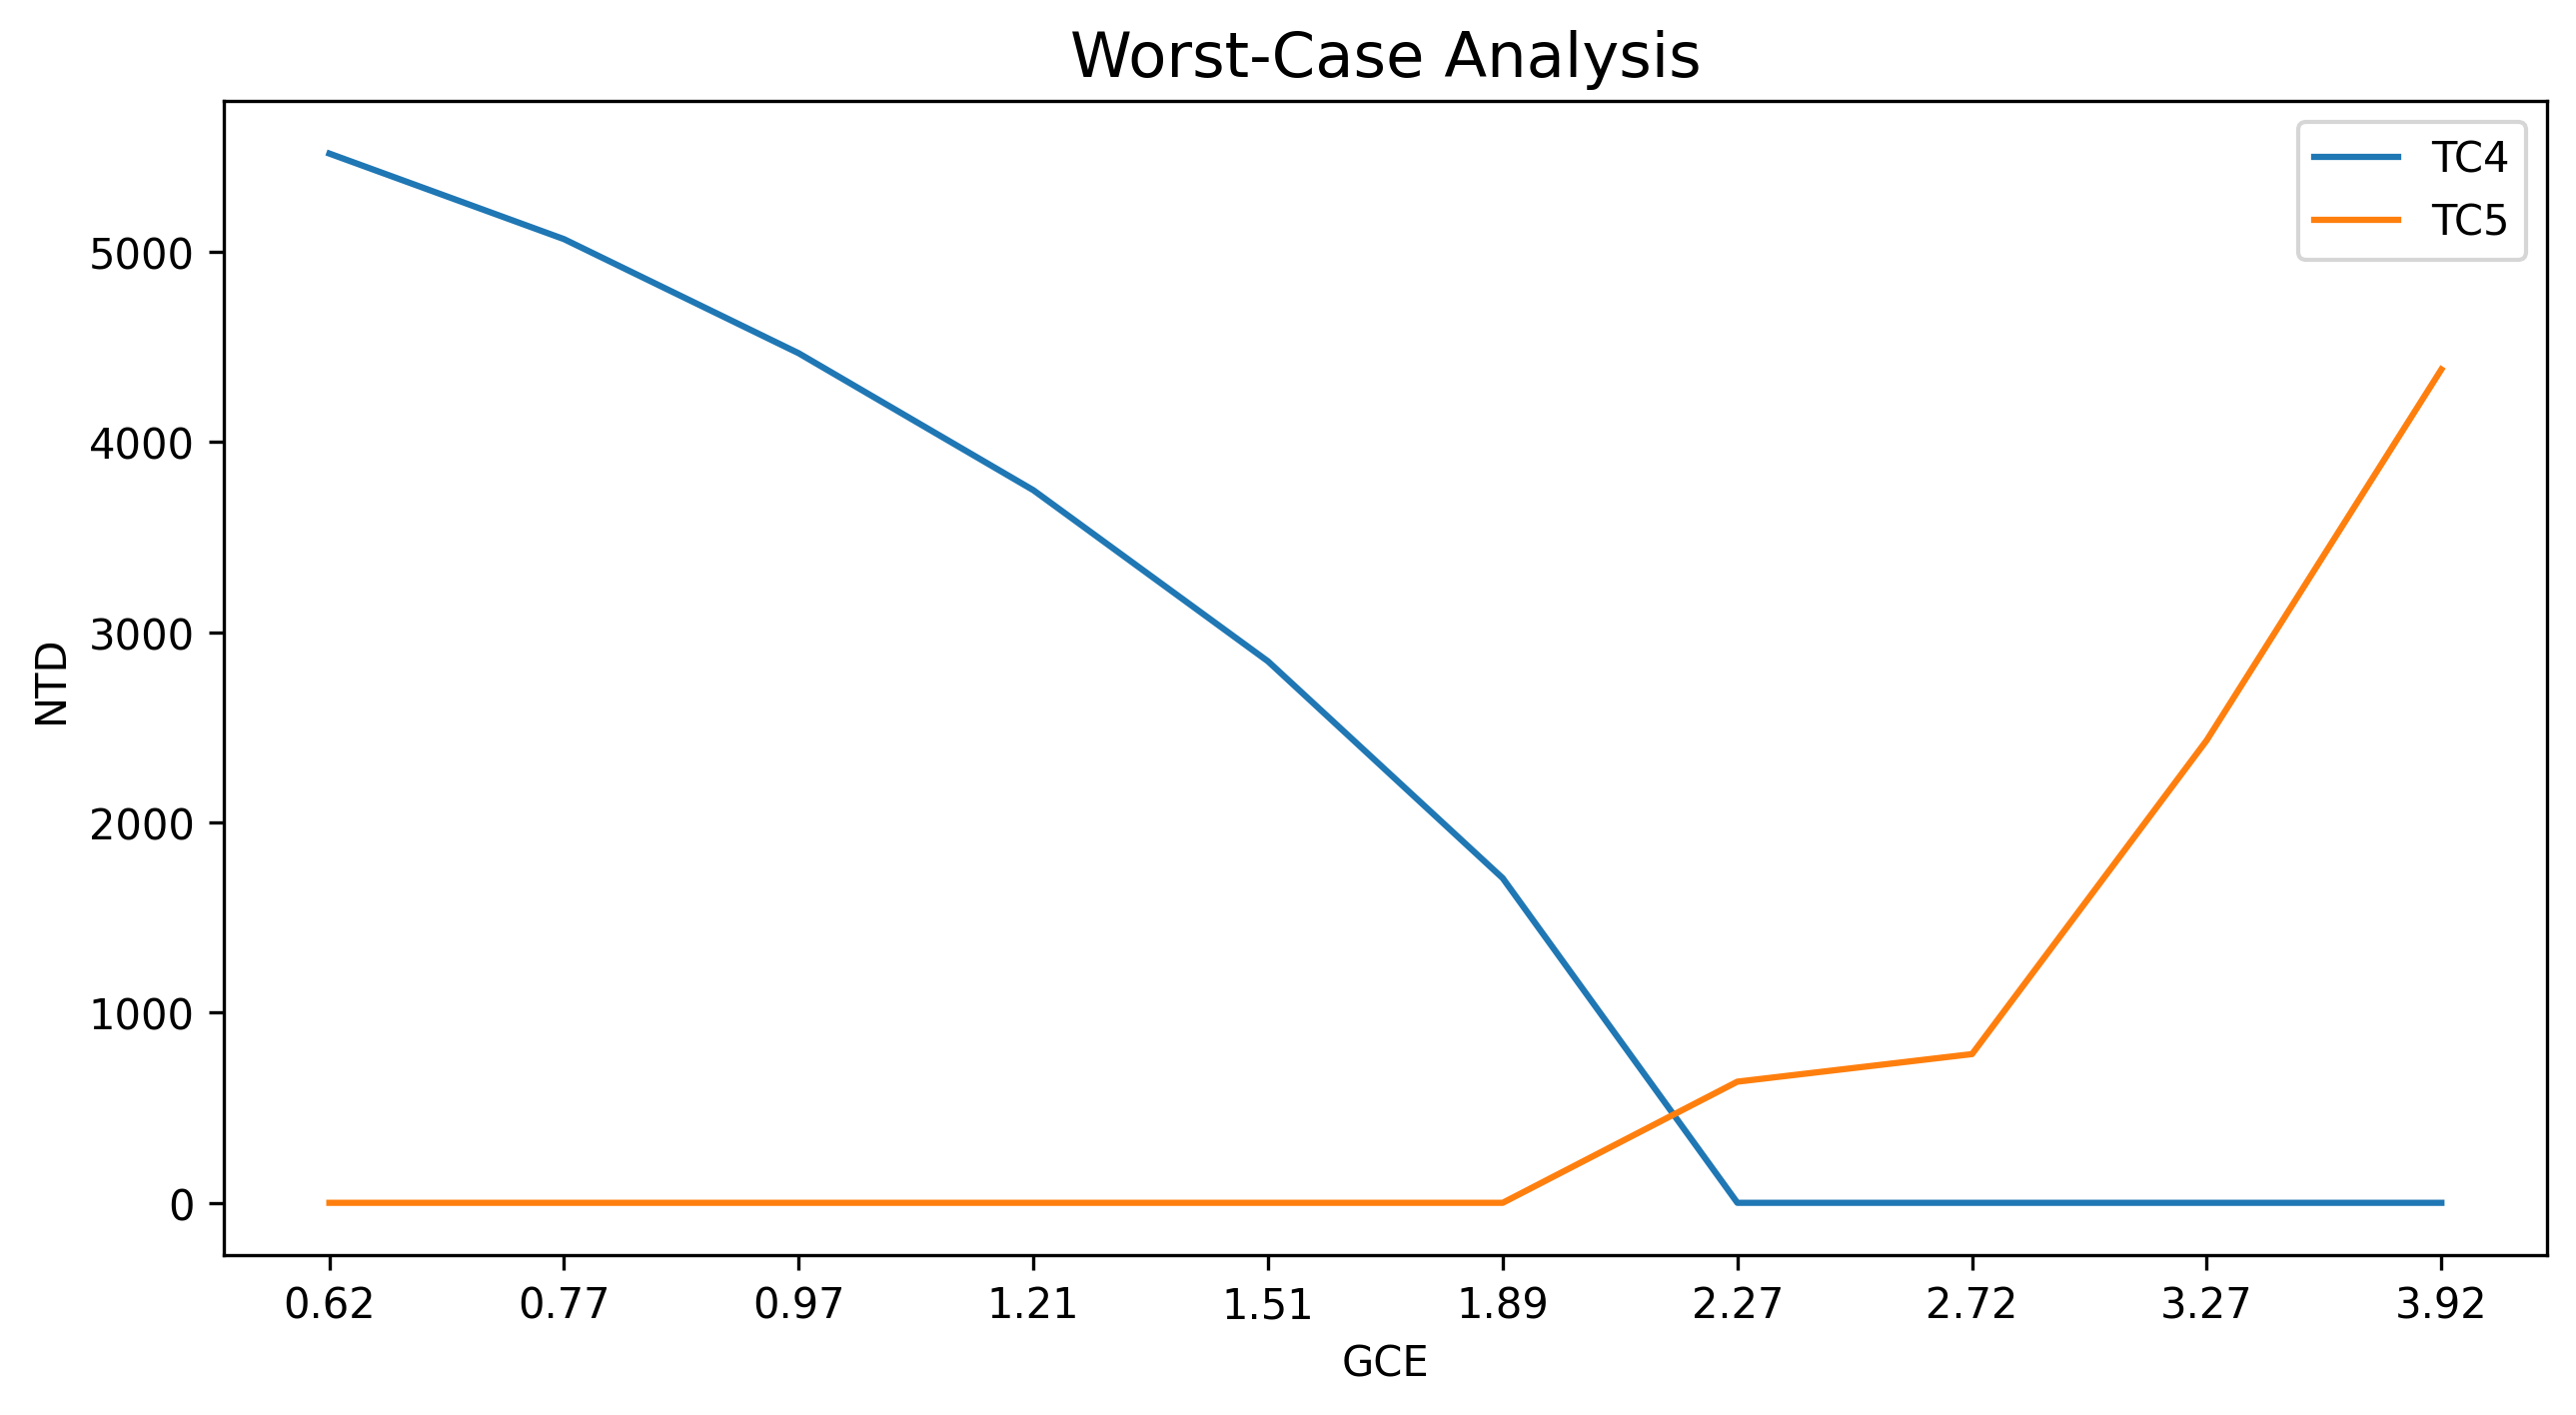

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)
for i in range(4, 6):
    plt.plot(x_row, np.array(data.iloc[i, 1:].astype(int)), label='TC%d'%i)
plt.xticks(x_row)

plt.title('Worst-Case Analysis', size=15)
plt.xlabel('GCE', size=10)
plt.ylabel('NTD', size=10)
plt.legend()

plt.show()

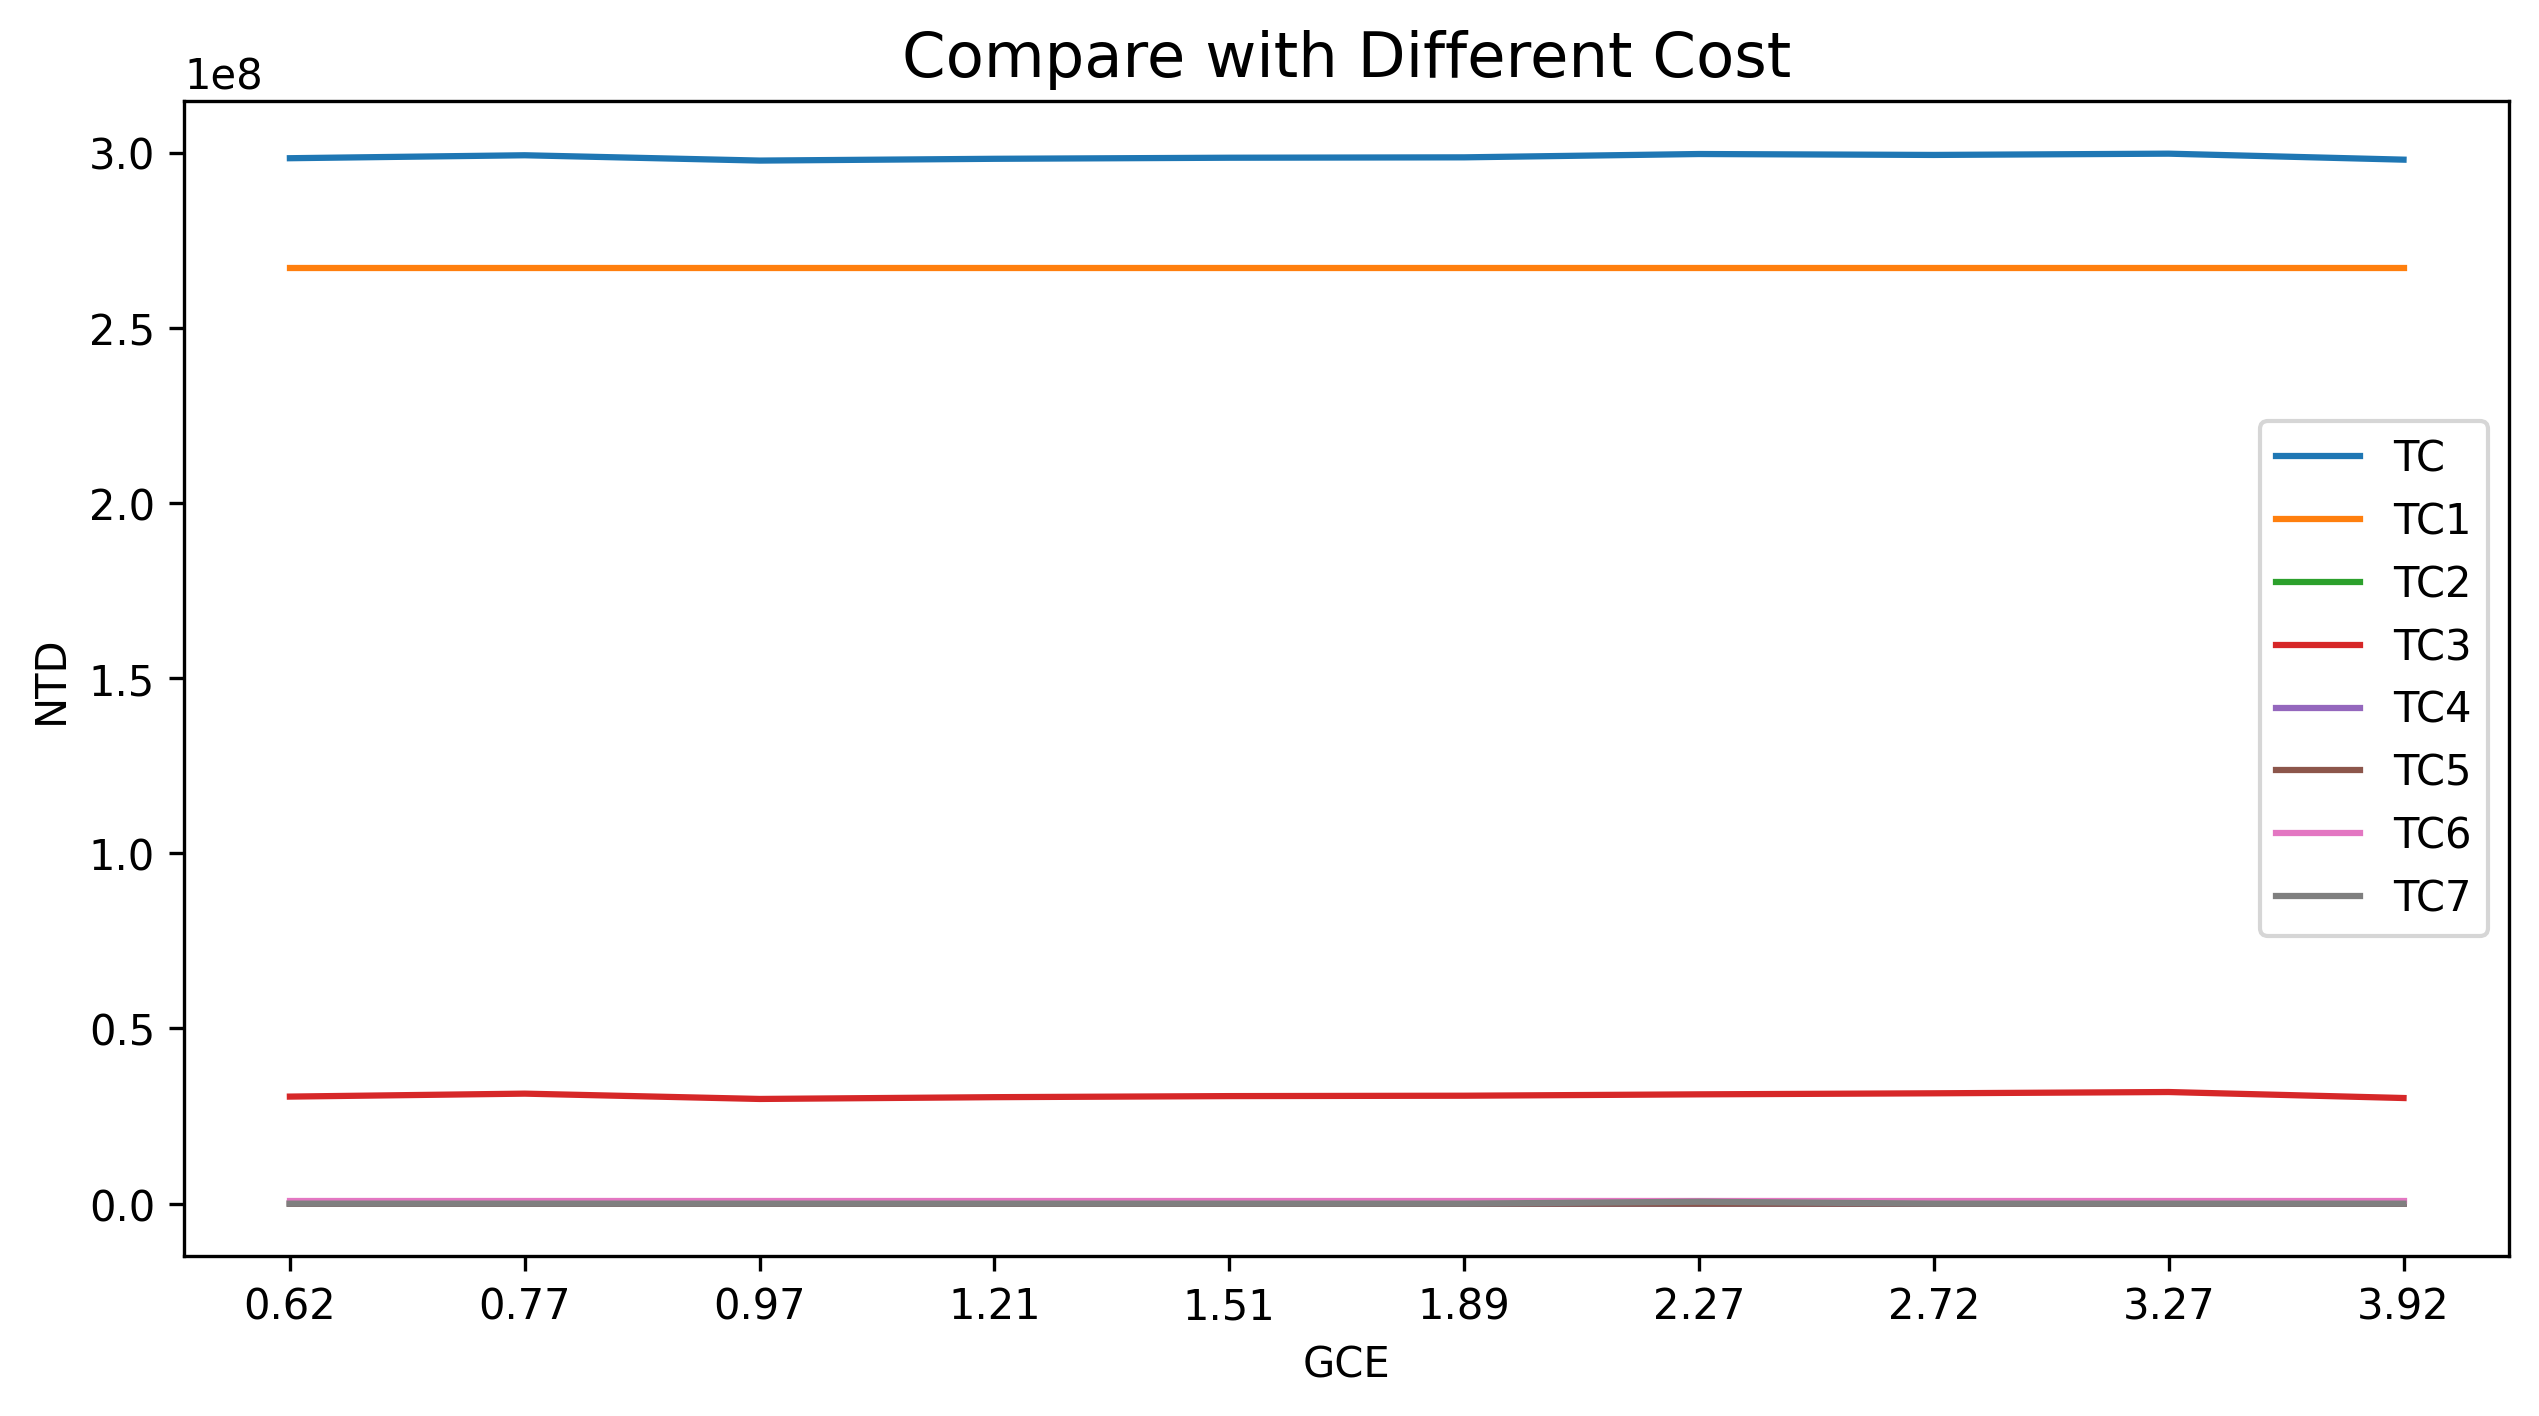

In [22]:
plt.figure(figsize=(10, 5), dpi=300)

for i in range(8):
    plt.plot(x_row, np.array(data.iloc[i, 1:].astype(int)), label='TC' if i==0 else 'TC%d'%i)
plt.xticks(x_row)

plt.title('Compare with Different Cost', size=15)
plt.xlabel('GCE', size=10)
plt.ylabel('NTD', size=10)
plt.legend()

plt.show()

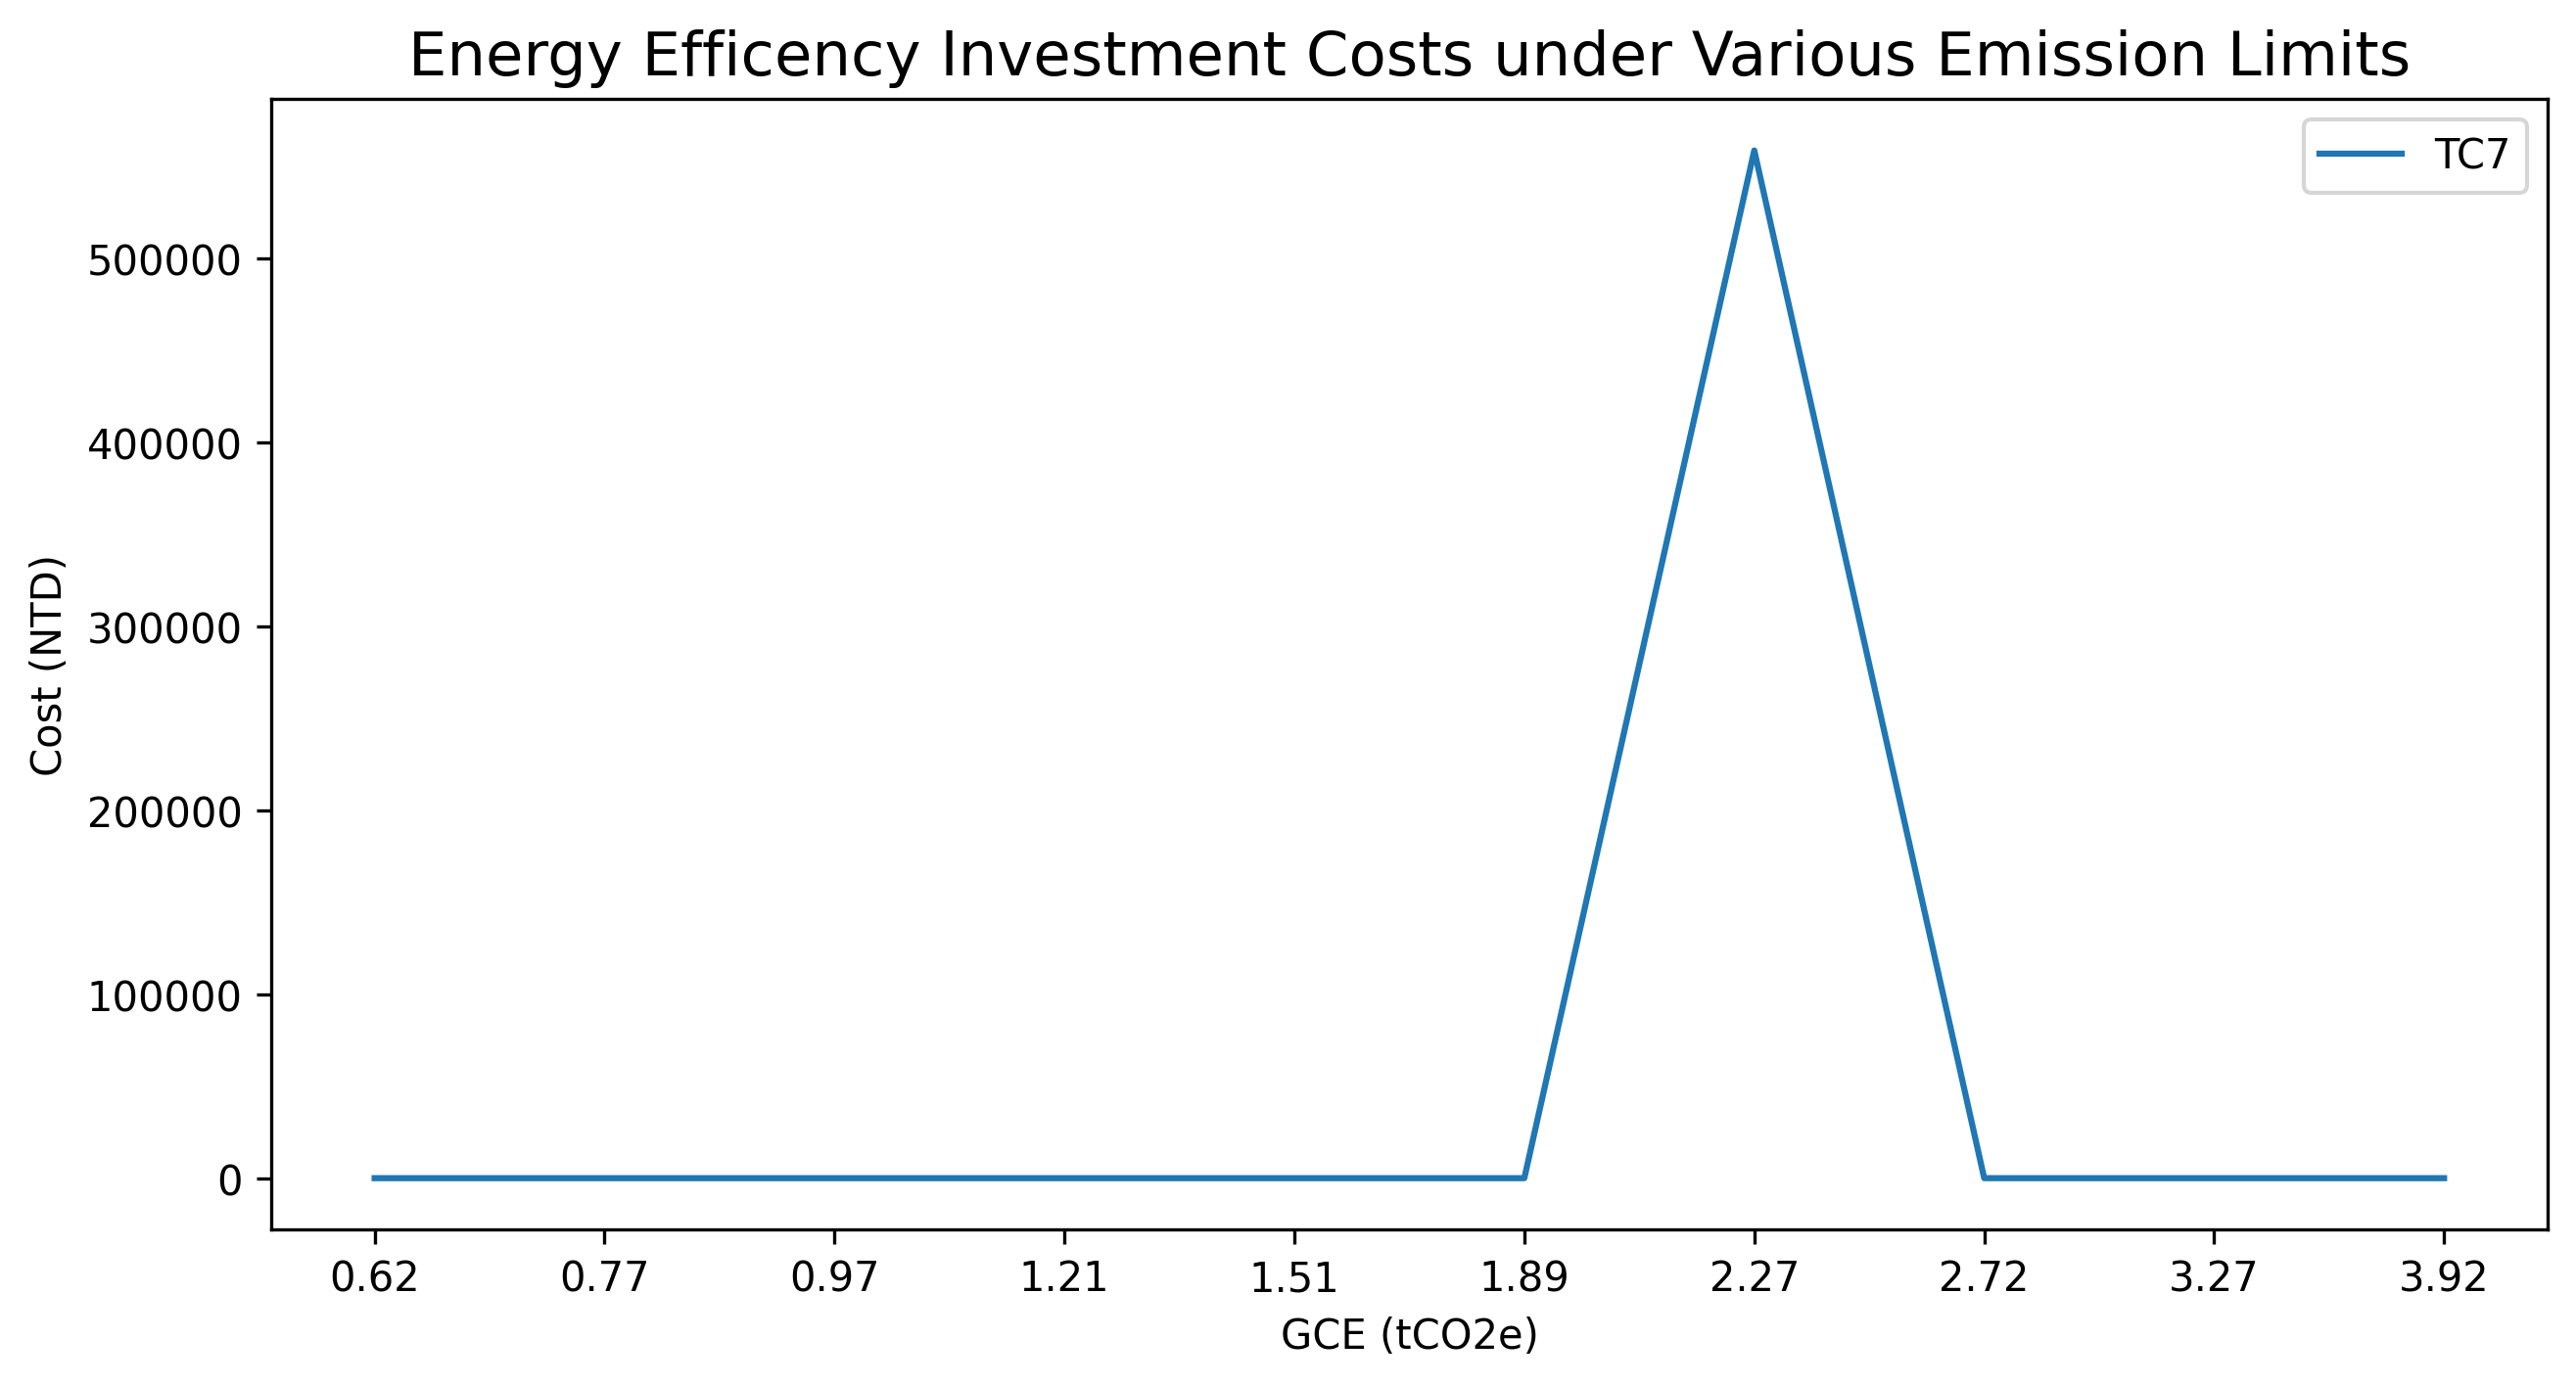

In [23]:
plt.figure(figsize=(10, 5), dpi=300)

for i in range(7, 8):
    plt.plot(x_row, np.array(data.iloc[i, 1:].astype(int)), label='TC%d'%i)
plt.xticks(x_row)

plt.title('Energy Efficency Investment Costs under Various Emission Limits', size=15)
plt.xlabel('GCE (tCO2e)', size=10)
plt.ylabel('Cost (NTD)', size=10)
plt.legend()

plt.show()

In [24]:
carbon_cost = []
for i in range(1, 1+len(data.iloc[4, 1:])):
    carbon_cost.append(data.iloc[4, i] - data.iloc[5, i])

carbon_cost

[5517.635057,
 5067.635057,
 4467.635057,
 3747.635057,
 2847.635057,
 1707.635057,
 -637.9199673,
 -782.3649433,
 -2432.364943,
 -4382.364943]

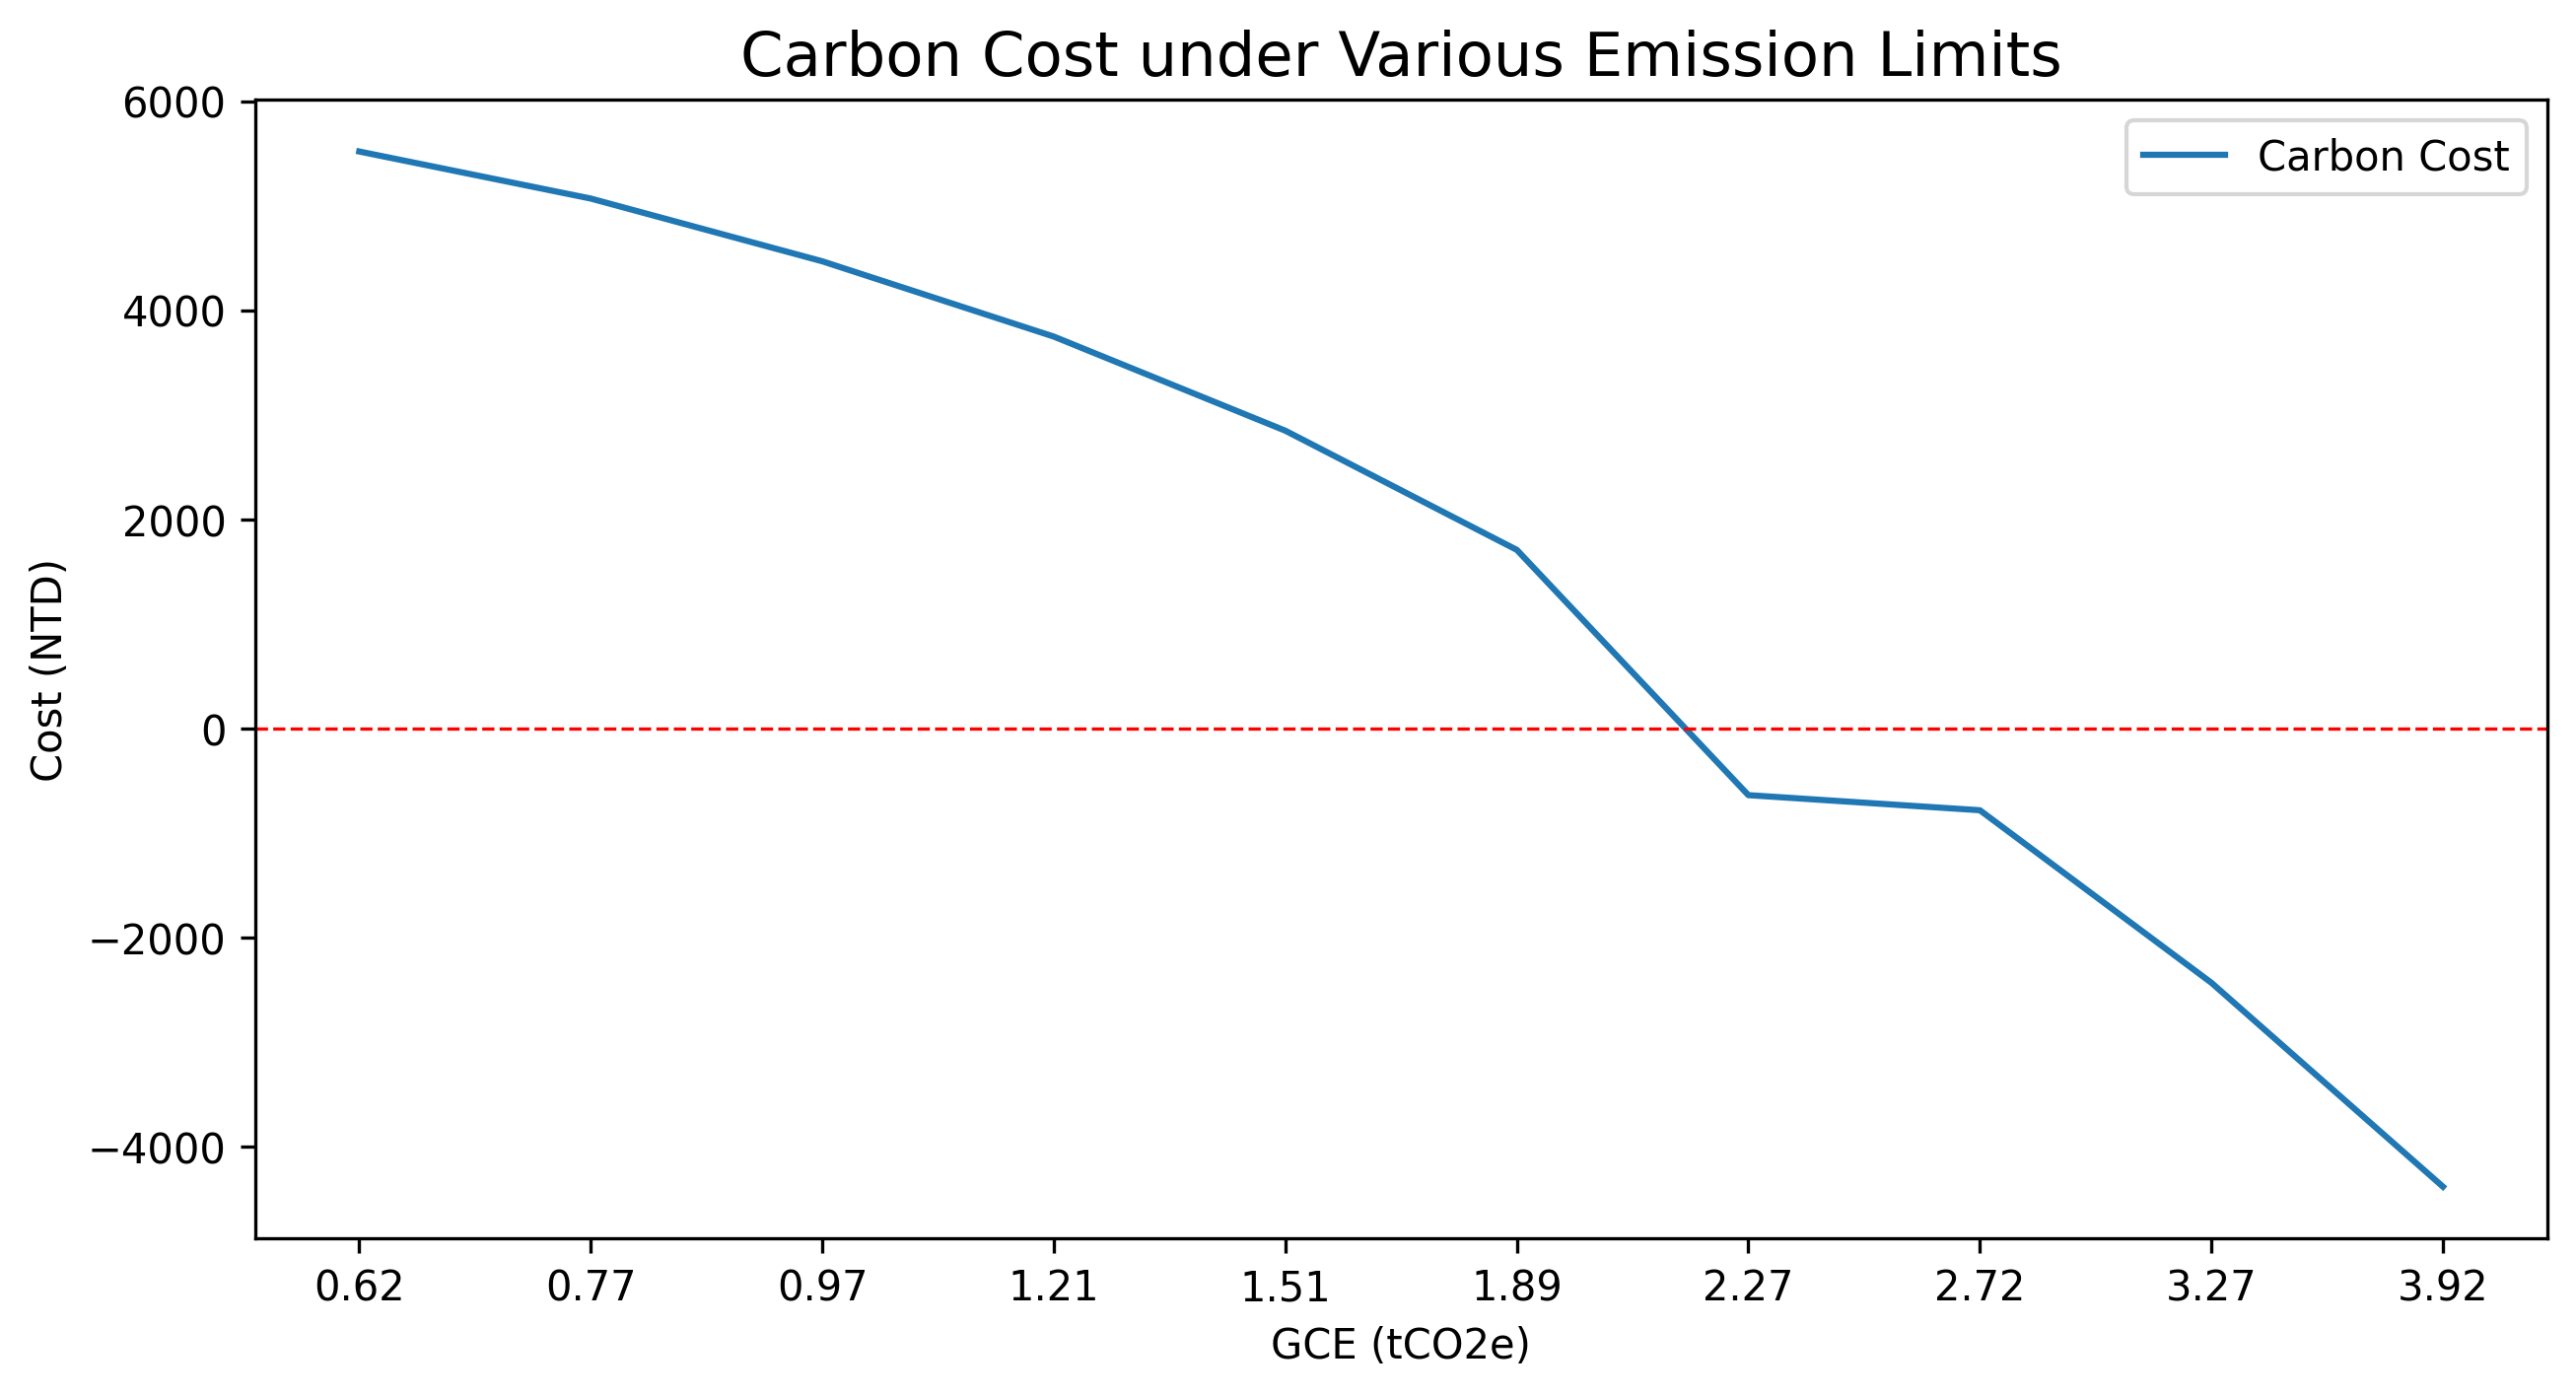

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)
'''
for i in range(4, 6):
    plt.plot(x_row, np.array(data.iloc[i, 1:].astype(int)), label='TC%d'%i)
'''
plt.plot(x_row, carbon_cost, label='Carbon Cost')
plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
plt.xticks(x_row)

plt.title('Carbon Cost under Various Emission Limits', size=15)
plt.xlabel('GCE (tCO2e)', size=10)
plt.ylabel('Cost (NTD)', size=10)
plt.legend()

plt.show()

In [26]:
data2 = pd.read_excel("2024_02_07.xlsx", sheet_name= 'test', header=None)

In [27]:
x_row2 = np.array(data2.iloc[14, 1:].astype(str))
x_row2

array(['0.62', '0.77', '0.97', '1.21', '1.51', '1.89', '2.16', '2.27',
       '2.38', '2.5', '2.63', '2.72', '3.27', '3.92'], dtype=object)

In [28]:
carbon_cost2 = []
for i in range(1, 1+len(data2.iloc[4, 1:])):
    carbon_cost2.append(data2.iloc[4, i] - data2.iloc[5, i])

carbon_cost2

[5517.635057,
 5067.635057,
 4467.635057,
 3747.635057,
 2847.635057,
 1707.635057,
 897.6350567032259,
 -637.9199673158255,
 -967.9199673941121,
 -122.3649432509801,
 -512.3649431,
 -782.3649433,
 -2432.364943,
 -4382.364943]

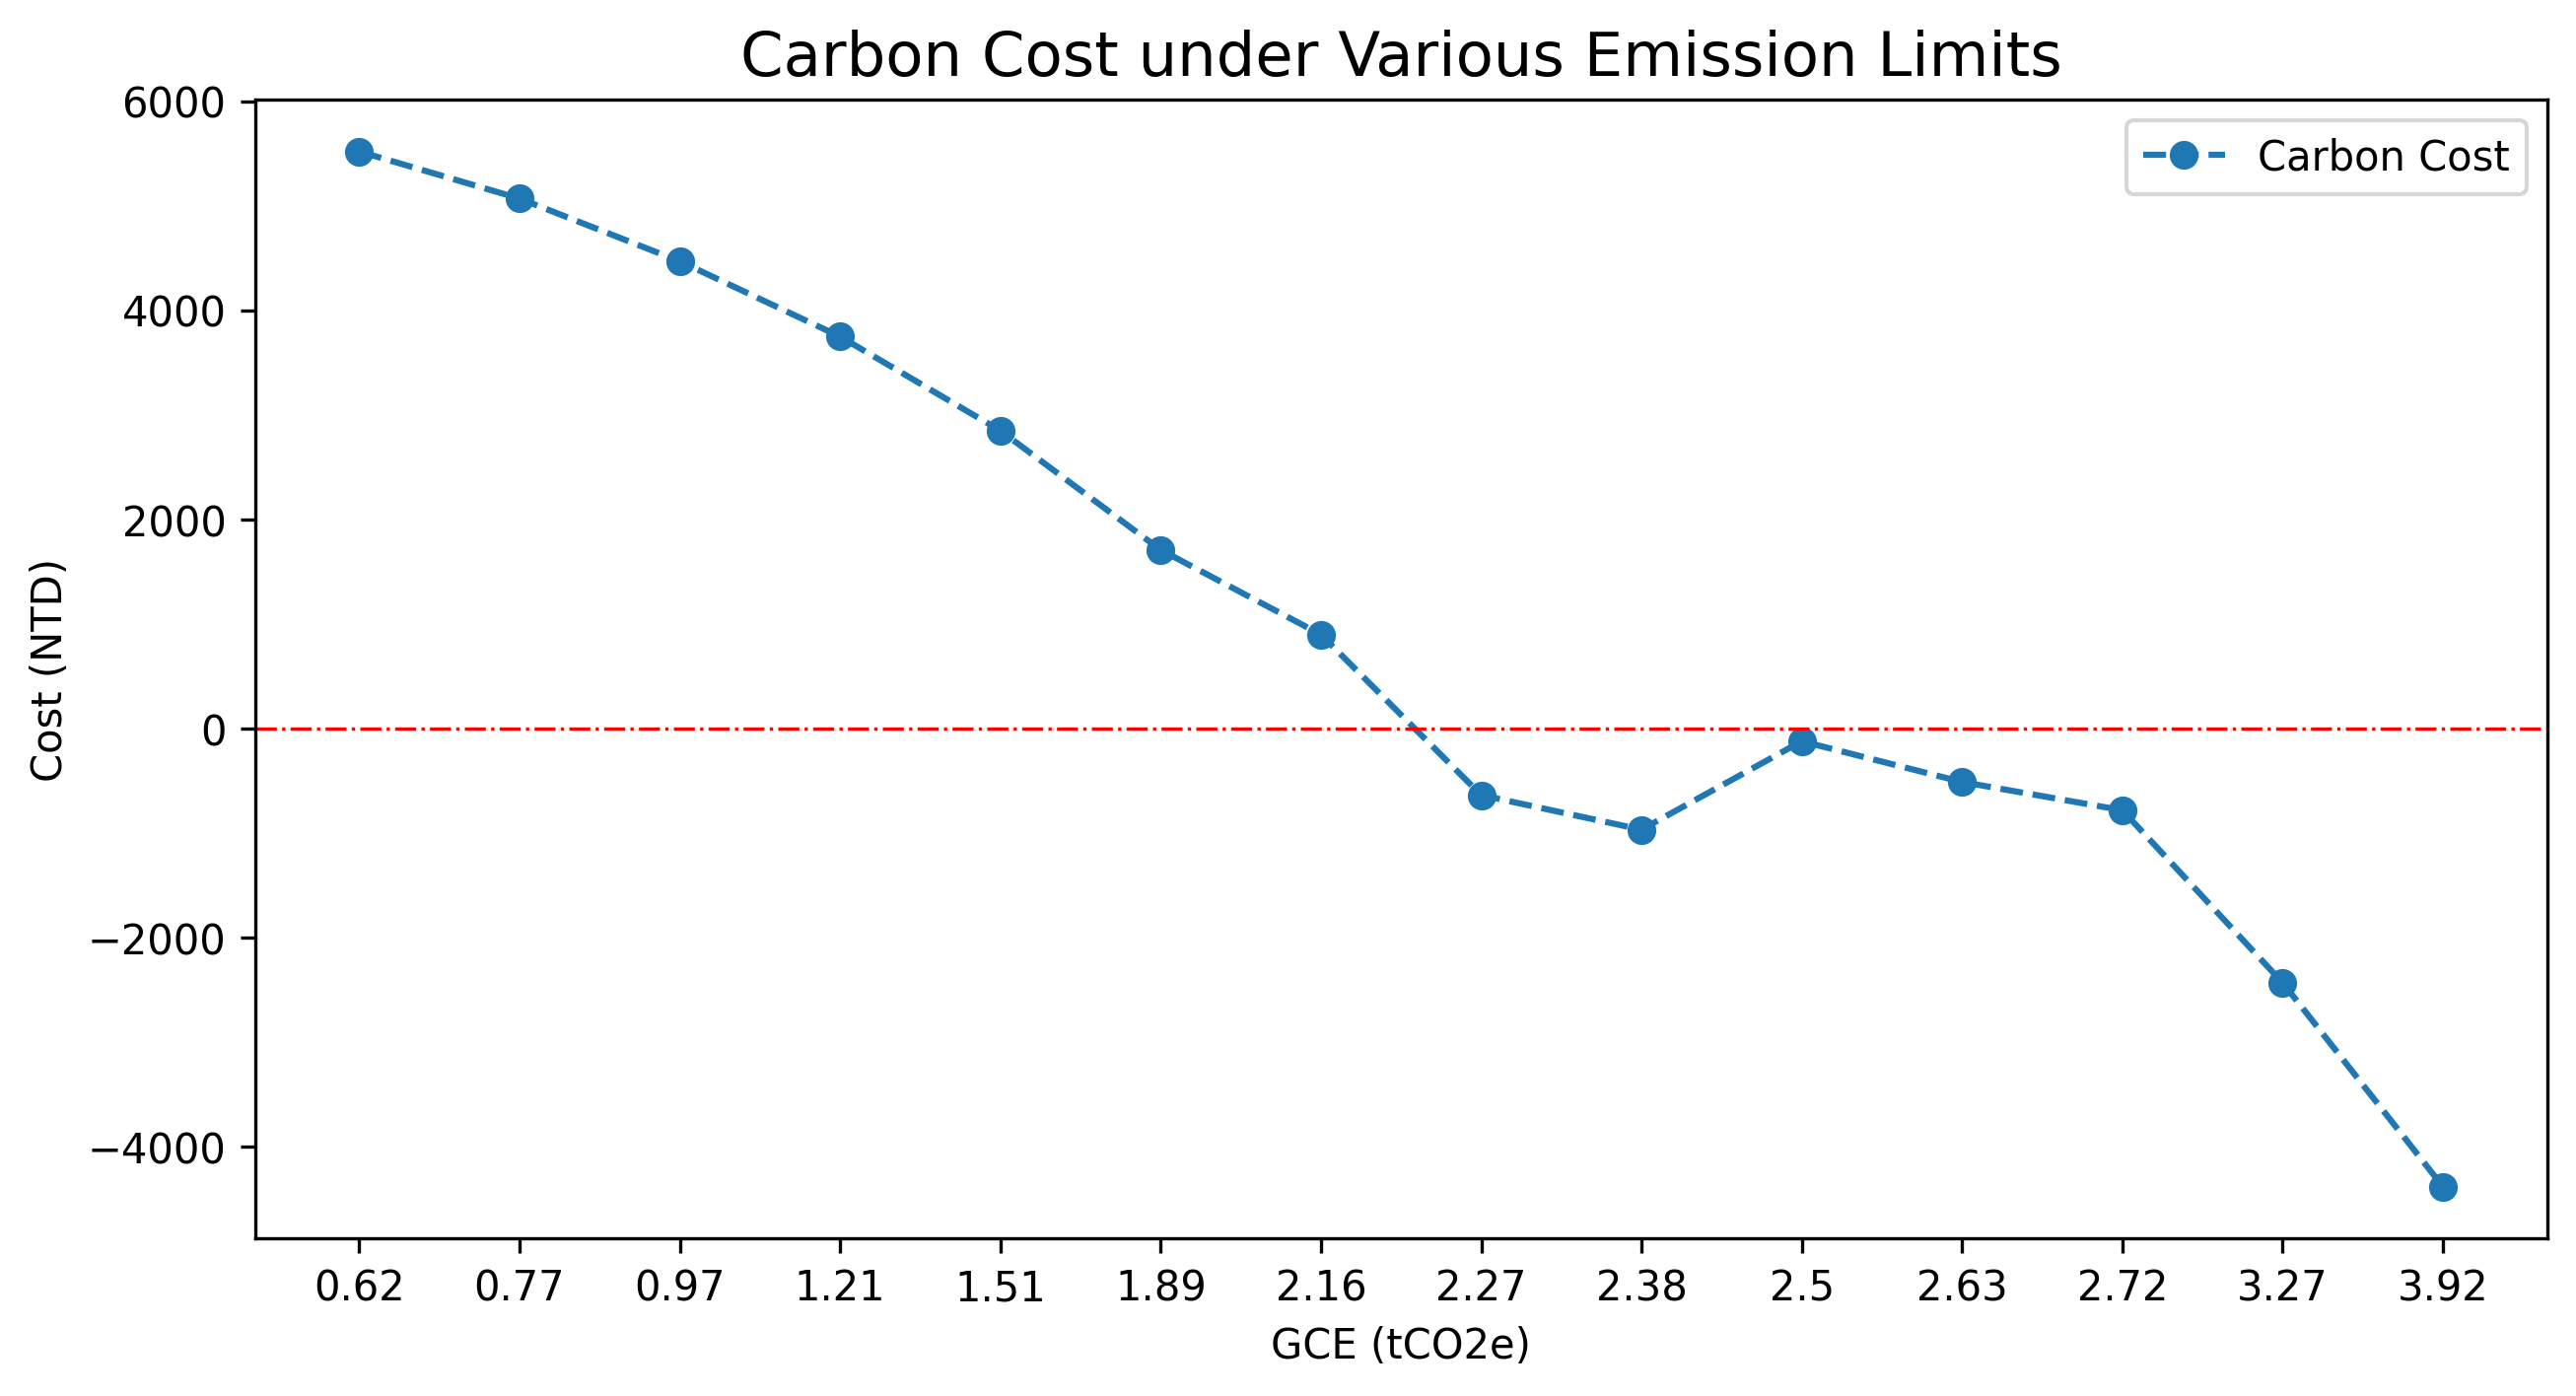

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5), dpi=300)
'''
for i in range(4, 6):
    plt.plot(x_row, np.array(data.iloc[i, 1:].astype(int)), label='TC%d'%i)
'''
plt.plot(x_row2, carbon_cost2, marker='o', linestyle='--', label='Carbon Cost')
plt.axhline(0, color='red', linestyle='-.', linewidth=0.8)
plt.xticks(x_row2)

plt.title('Carbon Cost under Various Emission Limits', size=15)
plt.xlabel('GCE (tCO2e)', size=10)
plt.ylabel('Cost (NTD)', size=10)
plt.legend()

plt.show()